<a href="https://colab.research.google.com/github/mhussar/mhussar.github.io/blob/main/examples/dreambooth/DreamBooth_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Sep 29 15:58:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

https://github.com/ShivamShrirao/diffusers/tree/main/examples/dreambooth

## Install Requirements

In [2]:
!git clone https://github.com/ShivamShrirao/diffusers
!pip install git+https://github.com/ShivamShrirao/diffusers             # 2 times for now cause colab wasn't able to find it for some reason. Will fix later prolly.
%pip install -U --pre triton
%pip install accelerate
%pip install transformers
%pip install ftfy
%pip install bitsandbytes

Cloning into 'diffusers'...
remote: Enumerating objects: 7291, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 7291 (delta 103), reused 115 (delta 75), pack-reused 7136
Receiving objects: 100% (7291/7291), 2.23 MiB | 25.15 MiB/s, done.
Resolving deltas: 100% (4779/4779), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ShivamShrirao/diffusers to /tmp/pip-req-build-a6_cbr82
  Running command git clone -q https://github.com/ShivamShrirao/diffusers /tmp/pip-req-build-a6_cbr82
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163 kB 31.3 MB/s 
  Created wheel for diffusers: filename=diffusers-0.4.0.dev0-py3-none-any.whl size=229469 sha256=7c09f0b3af16a4ebb7525135ea342c11926d4982ab95f6bc0c4a383ba9c4d743
  Stored in directory:

### Install xformers from precompiled wheel. (These were compiled on Tesla T4, thanks to https://github.com/metrolobo)

In [3]:
%pip install https://github.com/metrolobo/xformers_wheels/releases/download/1d31a3ac_various_6/xformers-0.0.14.dev0-cp37-cp37m-linux_x86_64.whl

# if precompiled wheels don't work, install it with the following command. It will take around 40 minutes to compile.
# %pip install git+https://github.com/facebookresearch/xformers@1d31a3a#egg=xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102.9 MB 93 kB/s 


## Login to HF and run

In [4]:
%cd /content/diffusers/examples/dreambooth

/content/diffusers/examples/dreambooth


In [5]:
from huggingface_hub import notebook_login
!git config --global credential.helper store
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [7]:
CLASS_NAME = "person"          # just a general name for class like dog for dog images.

In [8]:
MODEL_NAME = "CompVis/stable-diffusion-v1-4"
INSTANCE_DIR = "/content/data/jonInput"
!mkdir -p $INSTANCE_DIR
CLASS_DIR = f"/content/data/{CLASS_NAME}"
OUTPUT_DIR = "/content/models/jonOutput"            # sks is a rare identifier, feel free to replace it.

In [ ]:
# Upload your images by running this cell OR you can use the file manager on the left panel to upload to INSTANCE_DIR
import os
from google.colab import files
import shutil

uploaded = files.upload()
for filename in uploaded.keys():
    dst_path = os.path.join(INSTANCE_DIR, filename)
    print(f'move {filename} to {dst_path}')
    shutil.move(filename, dst_path)

In [9]:
# remove --use_8bit_adam flag if you got more than 18 GB VRAM.
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME --use_auth_token \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="jon" \
  --class_prompt="person" \
  --seed=1337 \
  --resolution=512 \
  --center_crop \
  --train_batch_size=1 \
  --mixed_precision="no" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=12 \
  --sample_batch_size=4 \
  --max_train_steps=1000


The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--num_cpu_threads_per_process` was set to `1` to improve out-of-box performance
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
Downloading: 100% 543/543 [00:00<00:00, 526kB/s]
Fetching 16 files:   0% 0/16 [00:00<?, ?it/s]
Downloading: 100% 342/342 [00:00<00:00, 244kB/s]
Fetching 16 files:   6% 1/16 [00:02<00:35,  2.35s/it]
Downloading: 100% 4.56k/4.56k [00:00<00:00, 3.81MB/s]
Fetching 16 files:  19% 3/16 [00:04<00:19,  1.46s/it]
Downloading:   0% 0.00/1.22G [00:00<?, ?B/s]
Downloading:   1% 7.71M/1.22G [00:00<00:15, 77.1MB/s]
Downloading:   1% 15.4M/1.22G [00:00<00:15, 77.3MB/s]
Downloading:   2% 23.2M/1.22G [00:00<00:15, 76.3MB/s]
Downloading:   3% 30.8M/1.22G [00:00<00:16, 73.7MB/s]
Downloading:   3%

## Inference

In [10]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from IPython.display import display

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [11]:
pipe = StableDiffusionPipeline.from_pretrained(OUTPUT_DIR, torch_dtype=torch.float16).to("cuda")

In [13]:
g_cuda = torch.Generator(device='cuda')
# g_cuda.manual_seed(1337)

  0%|          | 0/71 [00:00<?, ?it/s]

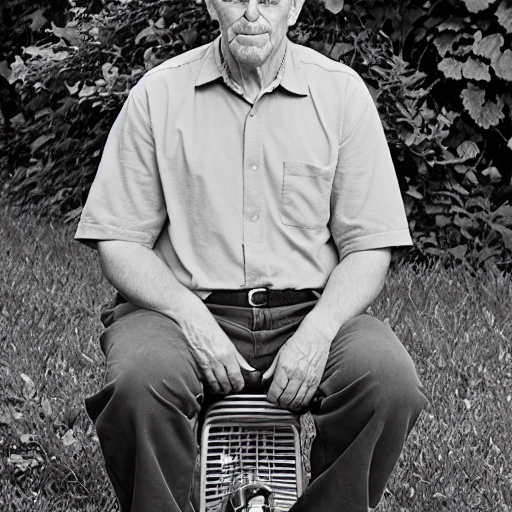

In [26]:
num_samples = 1
prompt = ["photograph of jon person in the style of norman rockwell"] * num_samples

with autocast("cuda"), torch.no_grad():
    images = pipe(prompt, height=512, width=512, num_inference_steps=70, guidance_scale=9, generator=g_cuda).images

for img in images:
    display(img)